### Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset

- `X_train`: For each example, contains 3 features:

   - Ear Shape (1 if pointy, 0 otherwise)
   
   - Face Shape (1 if round, 0 otherwise)
   
   - Whiskers (1 if present, 0 otherwise)


- `y_train`: Whether the animal is a cat
   
   - 1 if the animal is a cat
   
   - 0 otherwise

In [40]:
X_train = np.array([[1, 1, 1],
                    [0, 0, 1],
                    [0, 1, 0],
                    [1, 0, 1],
                    [1, 1, 1],
                    [1, 1, 0],
                    [0, 0, 0],
                    [1, 1, 0],
                    [0, 1, 0],
                    [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

### Entropy Function


$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$

In [41]:
def entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

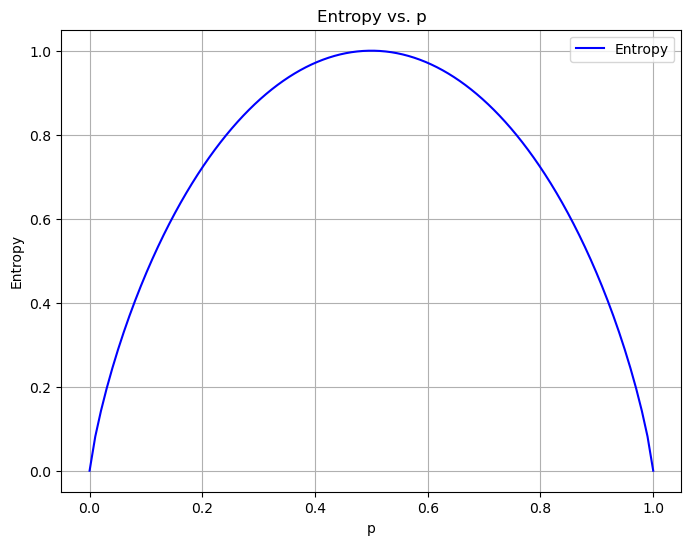

In [42]:
p_values = np.linspace(0.000, 1.000, 100)

entropy_values = [entropy(p) for p in p_values]

plt.figure(figsize=(8, 6))
plt.plot(p_values, entropy_values, label='Entropy', color='b')
plt.xlabel('p')
plt.ylabel('Entropy')
plt.title('Entropy vs. p')
plt.grid(True)
plt.legend()
plt.show()

### Information Gain

$$
\text {Information Gain }= H(p^{\text{node}}) - (w^{\text{left}} H(p^{\text{left}}) + w^{\text{right}} H(p^{\text{right}}))
$$

In [43]:
def split_indices(X, node_indices, feature):
    left_indices = []
    right_indices = []

    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)

    return left_indices, right_indices

In [44]:
def weighted_entropy(X, y, node_indices, index_feature):
    weighted_entropy = 0

    left_indices, right_indices = split_indices(X, node_indices, index_feature)
    w_left = len(left_indices) / len(X)
    w_right = len(right_indices) / len(X)
    p_left=0
    p_right=0

    if len(left_indices)>0:
        p_left = sum(y[left_indices]) / len(left_indices)
        
    if len(right_indices)>0:
        p_right = sum(y[right_indices]) / len(right_indices)
    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)

    return weighted_entropy

In [45]:
def information_gain(X, y, node_indices, index_feature):
    X_node, y_node = X[node_indices], y[node_indices]
    information_gain = 0

    p_node = sum(y_node[y_node == 1]) / len(y_node)
    node_entropy = entropy(p_node)

    weighted_entropy_temp = weighted_entropy(X, y, node_indices, index_feature)
    information_gain = node_entropy - weighted_entropy_temp

    return information_gain


In [46]:
node_indices = [0, 3, 4, 5, 7]

for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    i_gain = information_gain(X_train, y_train, node_indices, i)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")

Feature: Ear Shape, information gain if we split the root node using this feature: 0.36
Feature: Face Shape, information gain if we split the root node using this feature: 0.72
Feature: Whiskers, information gain if we split the root node using this feature: 0.45


### Making the Tree

In [47]:
def get_best_split(X, y, node_indices):
    num_features = X.shape[1]
    best_feature = -1
    max_info_gain = 0

    for feature in range(num_features):
        info_gain = information_gain(X, y, node_indices, feature)
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature

    return best_feature

In [48]:
def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth, tree):

    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
   

    best_feature = get_best_split(X, y, node_indices) 
    
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))
    

    left_indices, right_indices = split_indices(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1, tree)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1, tree)
    return tree

In [49]:
tree = []
build_tree_recursive(X_train, y_train, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], "Root", max_depth=2, current_depth=0, tree=tree)

 Depth 0, Root: Split on feature: 0
- Depth 1, Left: Split on feature: 1
  -- Left leaf node with indices [0, 4, 5, 7]
  -- Right leaf node with indices [3]
- Depth 1, Right: Split on feature: 2
  -- Left leaf node with indices [1]
  -- Right leaf node with indices [2, 6, 8, 9]


[([0, 3, 4, 5, 7], [1, 2, 6, 8, 9], 0),
 ([0, 4, 5, 7], [3], 1),
 ([1], [2, 6, 8, 9], 2)]